In [51]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from utils import get_file_data, get_config, get_file_avg

In [52]:
file_path = '../output/idea23/'
files = sorted(os.listdir(file_path))

cfg = get_config('../cfg/idea23_exp_cfg.json')

criticality_prob_list = cfg['critical_prob_list']

orig = [0.0] * len(criticality_prob_list)
wo_drop = [0.0] * len(criticality_prob_list)
ours = [0.0] * len(criticality_prob_list)

In [53]:
for file in files :
    if not file.endswith('.txt') :
        continue
    _params = [p.split('=') for p in file[:-4].split('&')]
    params = {k: v for k, v in _params}
    core_orig, core_wo_drop, core_ours = get_file_avg(file_path + file)
    index = criticality_prob_list.index(float(params['critical_prob']))

    orig[index] += core_orig
    wo_drop[index] += core_wo_drop
    ours[index] += core_ours

In [54]:
print(orig)
print(wo_drop)
print(ours)

[2.0, 3.2, 3.96, 4.36, 5.64, 6.16, 7.12, 8.24, 8.36, 10.0, 11.04]
[4.48, 6.76, 7.36, 8.92, 9.64, 10.72, 11.88, 12.16, 12.08, 11.8, 11.04]
[4.48, 4.64, 4.24, 4.88, 5.6, 5.84, 6.6, 7.8, 8.0, 10.04, 11.04]


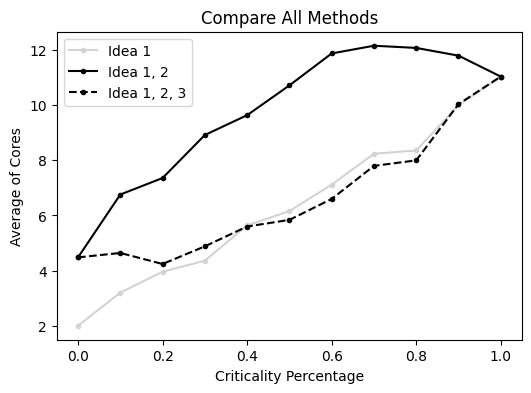

In [55]:
plt.figure(figsize=(6,4))

ax = plt.gca() 

plt.plot(criticality_prob_list, orig, label='Idea 1', color='lightgray', marker='.')
plt.plot(criticality_prob_list, wo_drop, label='Idea 1, 2', color='black', marker='.')
plt.plot(criticality_prob_list, ours, label='Idea 1, 2, 3', color='black', linestyle='dashed', marker='.')

plt.title('Compare All Methods')
plt.xlabel('Criticality Percentage')
plt.ylabel('Average of Cores')
ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.legend()
plt.show()